# importing necessary libraries

In [ ]:
import pandas as pd
pd.set_option("display.max_columns",None)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math

import seaborn as sns

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import svm

from sklearn.model_selection import train_test_split



# retriving and exploring dataset



In [ ]:
df=pd.read_csv("TaxiFare.csv")

In [ ]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [ ]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [ ]:
df.drop(['unique_id'],axis=1,inplace=True)

In [ ]:
df.head(10)


,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [ ]:
df.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
df.isna().sum()


amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

# changing formats for calculations

In [ ]:
df['date_time_of_pickup'] = df['date_time_of_pickup'].str.replace(' UTC', '')


In [ ]:
df['date_time_of_pickup']= pd.to_datetime(df['date_time_of_pickup']).dt.round('H')


In [ ]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 17:00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 01:00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 05:00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 08:00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:00:00,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:00:00,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 05:00:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:00:00,-73.946062,40.777567,-73.953450,40.779687,2


In [ ]:
df['date_time_of_pickup'] = df['date_time_of_pickup'].astype(str).str[11:13]


In [ ]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,17,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,17,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,01,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,05,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,08,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,23,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,17,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,05,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,07,-73.946062,40.777567,-73.953450,40.779687,2


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
df['date_time_of_pickup']=df['date_time_of_pickup'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  int32  
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int32(1), int64(1)
memory usage: 2.5 MB


In [ ]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,17,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,17,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,1,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,5,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,8,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,23,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,17,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,5,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,7,-73.946062,40.777567,-73.953450,40.779687,2


# Methods for changing latitude and longitudes into Distance

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(k):
    lon1, lat1, lon2, lat2 = map(radians, [k[0], k[1], k[2], k[3]])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    return 6371* c

In [ ]:
df['distance']=df[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
0,4.5,17,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,16.9,17,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,5.7,1,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,7.7,5,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,5.3,8,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...
49995,15.0,23,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,7.5,17,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,6.9,5,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,4.5,7,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


In [ ]:
df.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1,inplace=True)

# outlier analysis visualization

In [ ]:
l1=['distance','date_time_of_pickup','no_of_passenger','amount']


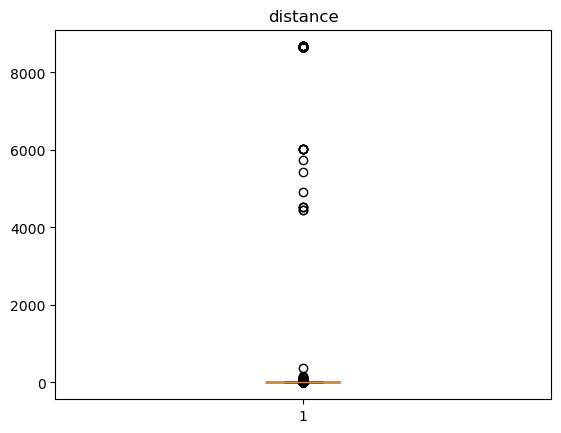

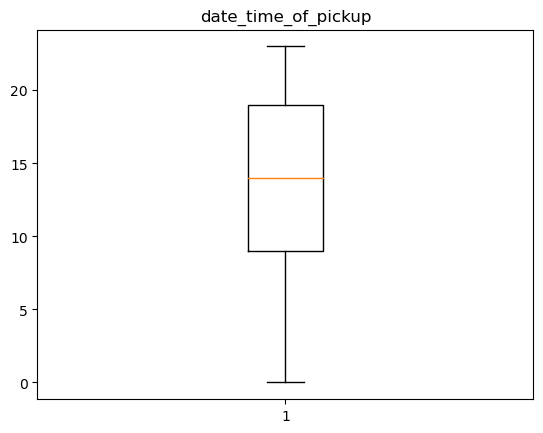

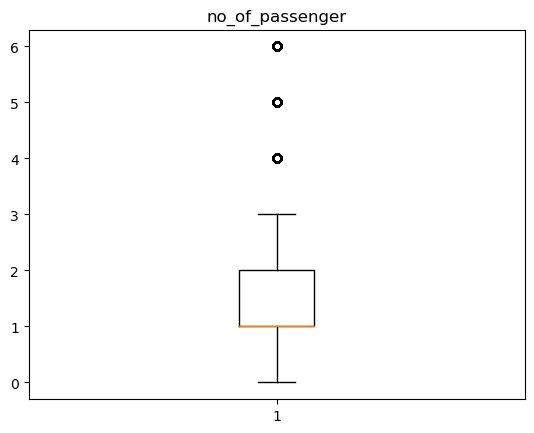

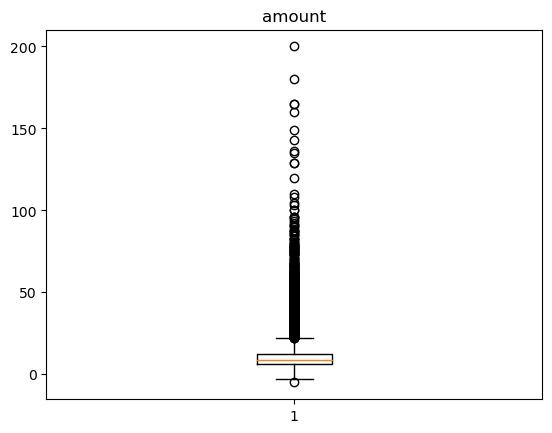

In [ ]:
for i in l1:
    plt.boxplot(df[f'{i}'])
    plt.title(i)
    plt.show()

# outliers removal

In [ ]:
def remove_outlier(col):
    sorted(col)
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lowerRange=q1-(1.5*iqr)
    higherRange=q3+(1.5*iqr)
    return lowerRange,higherRange


In [ ]:
l2=['distance','no_of_passenger','amount']

In [ ]:
for i in l2:
    l,u=remove_outlier(df[f'{i}'])
    df[f'{i}']=np.where(df[f'{i}']>u,u,df[f'{i}'])
    df[f'{i}']=np.where(df[f'{i}']<l,l,df[f'{i}'])

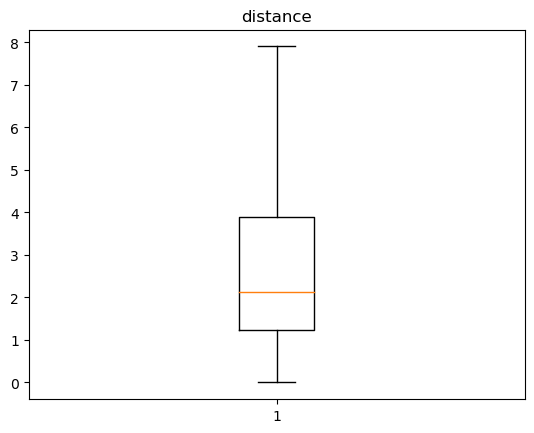

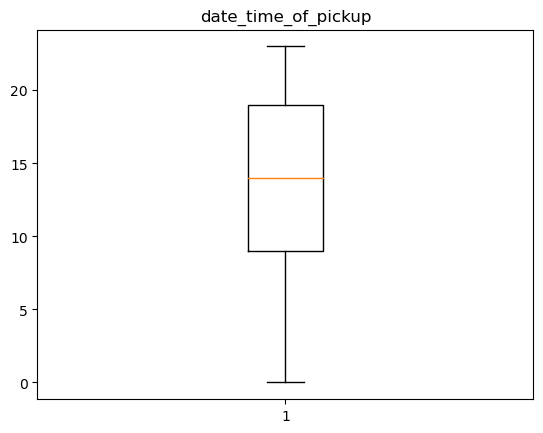

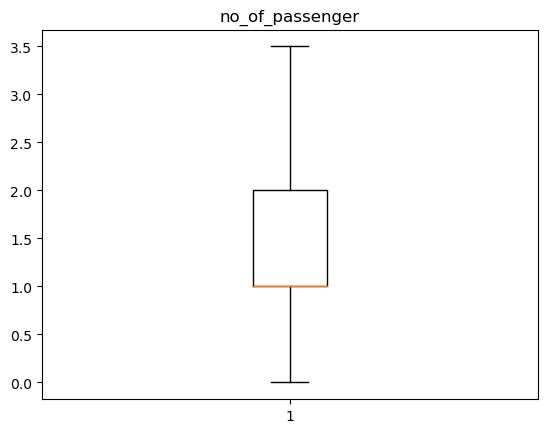

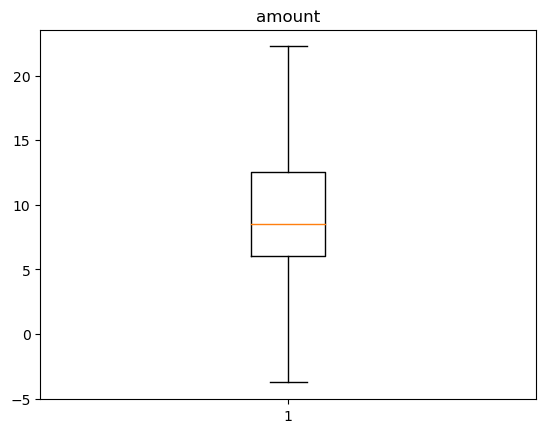

In [ ]:
for i in l1:
    plt.boxplot(df[f'{i}'])
    plt.title(i)
    plt.show()

# Analysis Visualization

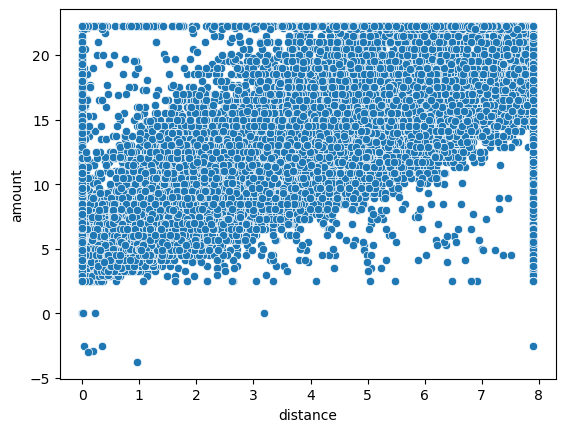

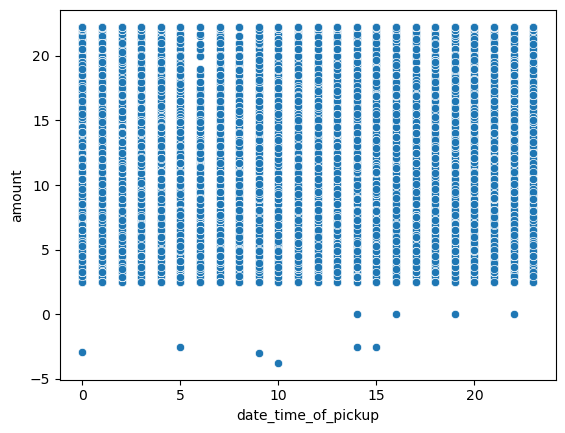

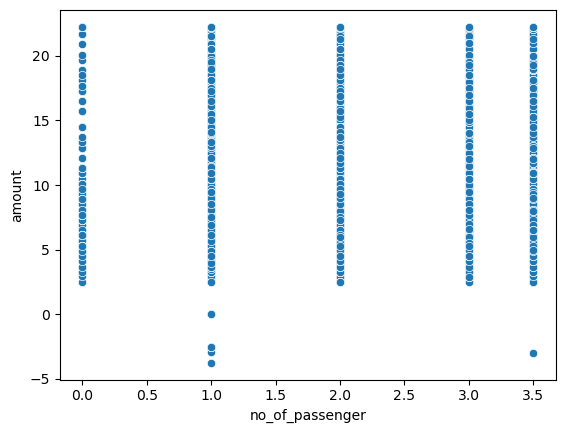

In [ ]:
l1.pop()
for i in l1:
    sns.scatterplot(x=df[f'{i}'],y=df.amount)
    plt.show()


# Model Train And Test

In [ ]:
reg=LinearRegression()

In [ ]:
x,X,y,Y=train_test_split(df.drop(['amount'],axis=1),df['amount'],test_size=0.05)

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.score(X,Y)

0.7232905144530172

In [ ]:
reg.score(x,y)

0.7109626604034914

# Getting Accuracy

In [ ]:
test_score=[]
train_score=[]
for _ in range(1):
    x,X,y,Y=train_test_split(df.drop(['amount'],axis=1),df['amount'],test_size=0.05)
    reg.fit(x,y)
    train_score.append(reg.score(x,y))
    test_score.append(reg.score(X,Y))
print("train_socre:",np.mean(train_score),"test_score",np.mean(test_score))

train_socre: 0.7118612056020751 test_score 0.7056139576304561


# we got an accuracy nearly equals 70%